In [18]:
import fastf1
import fastf1.plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pandas as pd
import numpy as np

fastf1.plotting.setup_mpl(misc_mpl_mods=False)

In [19]:
SESSION = 'BRITISH'
YEAR = 2023

fastf1.plotting.setup_mpl(misc_mpl_mods=False)

race = fastf1.get_session(YEAR, SESSION, 'R')
race.load()

logger      WARNING 	Failed to load schedule from FastF1 backend!
req            INFO 	Using cached data for season_schedule


core           INFO 	Loading data for British Grand Prix - Race [v3.0.6]
req            INFO 	Using cached data for driver_info
core        WARNING 	No result data for this session available on Ergast! (This is expected for recent sessions)
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	Cannot load lap times for first lap from Ergast. Timing data is not available for this session.
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '4', '81'

In [20]:
retired_drivers = race.results.loc[race.results['Status'] != 'Finished']

driver_laps = race.laps.reset_index()
drivers = pd.unique(race.laps['Driver'])

stints = driver_laps[["Driver", "Time", "Position", "Stint", "Compound", "LapNumber", "LapTime", "TyreLife"]]
stints['LapTimeSeconds'] = stints['LapTime'].dt.total_seconds().interpolate(method='bfill')
# stints['LapTimeSeconds'] = stints['LapTime'].dt.total_seconds()


C:\Users\WillMItchell\AppData\Local\Temp\ipykernel_15468\1504033074.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stints['LapTimeSeconds'] = stints['LapTime'].dt.total_seconds().interpolate(method='bfill')


In [21]:

stints['FullName'] = stints['Driver'].map(fastf1.plotting.DRIVER_TRANSLATE)
stints['Color'] = stints['FullName'].map(fastf1.plotting.DRIVER_COLORS)
stints['CumulativeLapTime'] = stints.groupby('Driver')['LapTimeSeconds'].cumsum()

# If a driver does not finish on the lead lap or retires, they 

stints.reset_index()
stints.to_csv('output.csv')

C:\Users\WillMItchell\AppData\Local\Temp\ipykernel_15468\1313602985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stints['FullName'] = stints['Driver'].map(fastf1.plotting.DRIVER_TRANSLATE)
C:\Users\WillMItchell\AppData\Local\Temp\ipykernel_15468\1313602985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stints['Color'] = stints['FullName'].map(fastf1.plotting.DRIVER_COLORS)
C:\Users\WillMItchell\AppData\Local\Temp\ipykernel_15468\1313602985.py:3: SettingWithCopyWarning: 
A value is trying to be s

In [22]:
# Assuming your DataFrame is named 'df' and you have the 'CumulativeLapTime' column calculated previously
stints['SmallestCumulativeLapTime'] = stints['LapNumber'].map(stints.groupby('LapNumber')['CumulativeLapTime'].min())
stints['IntervalToLeader'] = stints['CumulativeLapTime'] - stints['SmallestCumulativeLapTime']
stints['NormalizedIntervalToLeader'] = stints['CumulativeLapTime'] / stints['SmallestCumulativeLapTime']
stints.head()

C:\Users\WillMItchell\AppData\Local\Temp\ipykernel_15468\3283125456.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stints['SmallestCumulativeLapTime'] = stints['LapNumber'].map(stints.groupby('LapNumber')['CumulativeLapTime'].min())
C:\Users\WillMItchell\AppData\Local\Temp\ipykernel_15468\3283125456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stints['IntervalToLeader'] = stints['CumulativeLapTime'] - stints['SmallestCumulativeLapTime']
C:\Users\WillMItchell\AppData\Local\Temp\ipykernel_15468\32

,Driver,Time,Position,Stint,Compound,LapNumber,LapTime,TyreLife,LapTimeSeconds,FullName,Color,CumulativeLapTime,SmallestCumulativeLapTime,IntervalToLeader,NormalizedIntervalToLeader
0,VER,0 days 01:03:46.185000,2.0,1.0,MEDIUM,1.0,NaT,1.0,93.433,max verstappen,#0600ef,93.433,93.046,0.387,1.004159
1,VER,0 days 01:05:19.618000,2.0,1.0,MEDIUM,2.0,0 days 00:01:33.433000,2.0,93.433,max verstappen,#0600ef,186.866,186.092,0.774,1.004159
2,VER,0 days 01:06:52.348000,2.0,1.0,MEDIUM,3.0,0 days 00:01:32.730000,3.0,92.730,max verstappen,#0600ef,279.596,279.272,0.324,1.001160
3,VER,0 days 01:08:25.128000,2.0,1.0,MEDIUM,4.0,0 days 00:01:32.780000,4.0,92.780,max verstappen,#0600ef,372.376,372.044,0.332,1.000892
4,VER,0 days 01:09:57.710000,1.0,1.0,MEDIUM,5.0,0 days 00:01:32.582000,5.0,92.582,max verstappen,#0600ef,464.958,464.958,0.000,1.000000


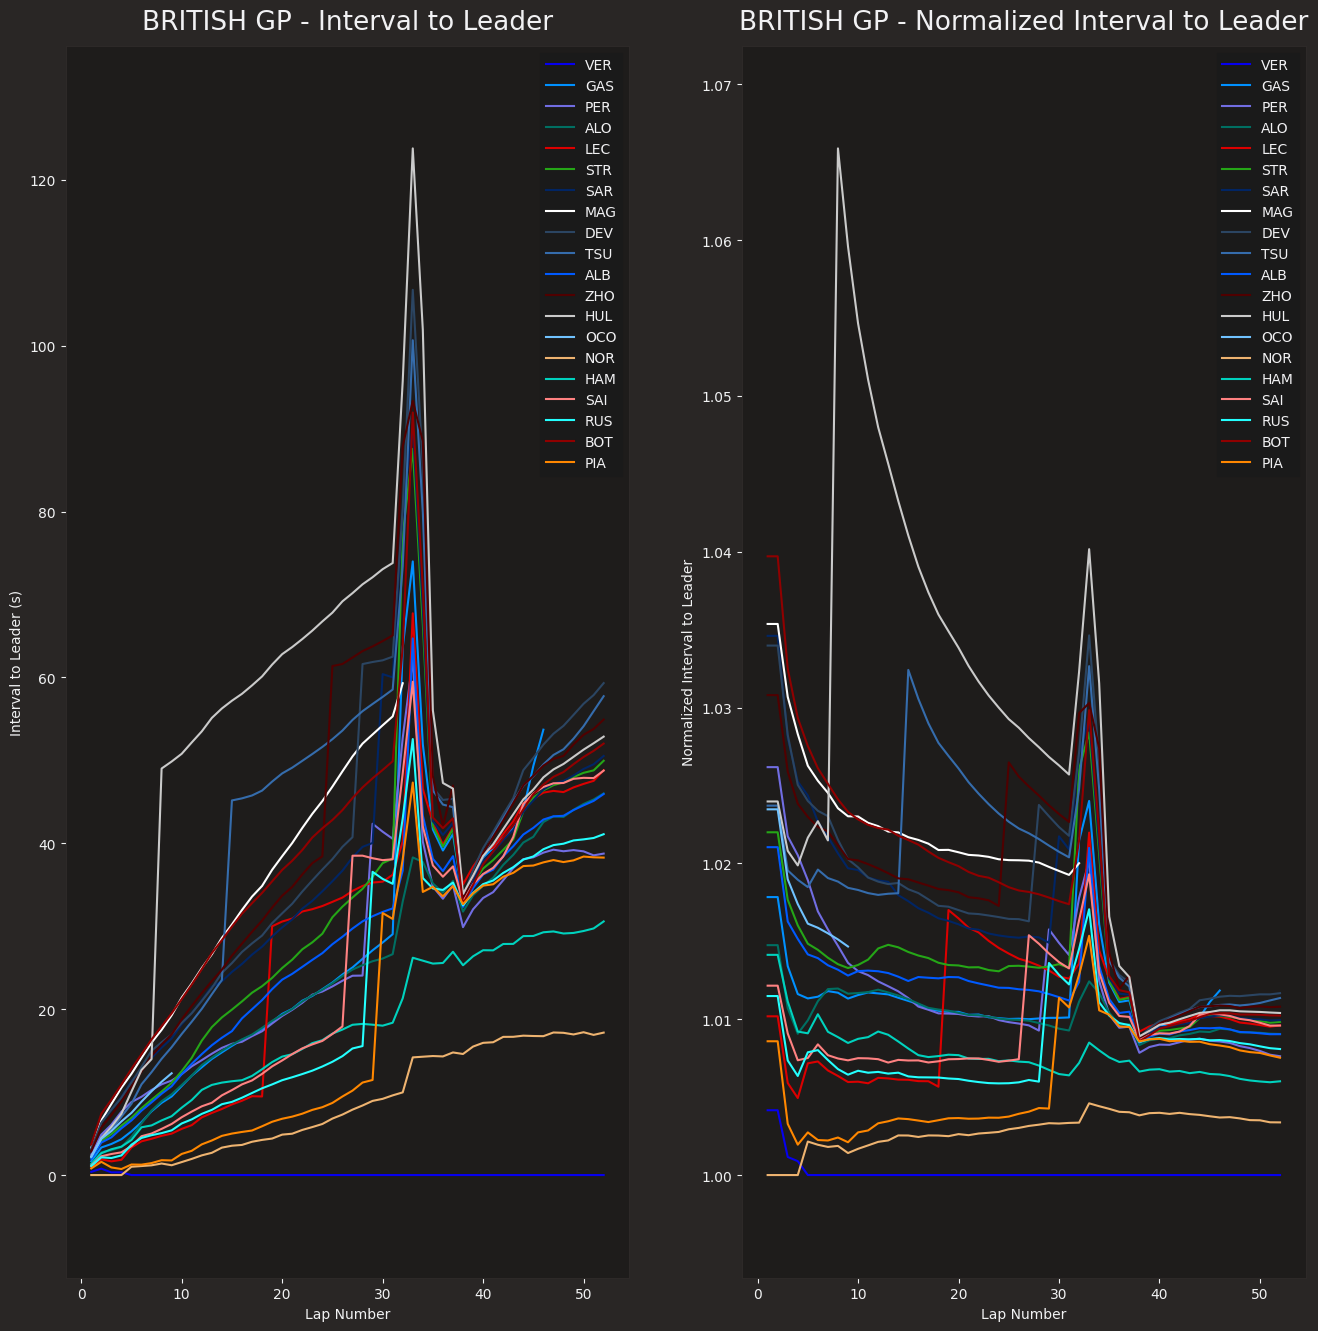

In [23]:
fig, ax = plt.subplots(ncols=2,figsize=(16,16))

for driver in drivers:
    driver_stint = stints.loc[stints['Driver'] == driver].reset_index()
    driver_color = fastf1.plotting.driver_color(driver)
     
    ax[0].plot(driver_stint["LapNumber"],
            driver_stint["IntervalToLeader"],
            color=driver_color,
            label=driver
           )

ax[0].set_title(f'{SESSION} GP - Interval to Leader')
ax[0].set_xlabel('Lap Number')
ax[0].set_ylabel('Interval to Leader (s)')
ax[0].margins(0.05, 0.1)
ax[0].legend()

for driver in drivers:
    driver_stint = stints.loc[stints['Driver'] == driver].reset_index()
    driver_color = fastf1.plotting.driver_color(driver)
     
    plt.plot(driver_stint["LapNumber"],
            driver_stint["NormalizedIntervalToLeader"],
            color=driver_color,
            label=driver
           )

ax[1].set_title(f'{SESSION} GP - Normalized Interval to Leader')
ax[1].set_xlabel('Lap Number')
ax[1].set_ylabel('Normalized Interval to Leader')
ax[1].margins(0.05, 0.1)
ax[1].legend()